# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import csv



# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weather_results.csv"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

count_one = 1
set_one = 1

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities
count_one = 0
set_one = 1

# loops for creation of dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | mehamn
Processing Record 2 of Set 1 | glinka
Processing Record 3 of Set 1 | chalus
City not found. Skipping...
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | grindavik
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | mayo
Processing Record 9 of Set 1 | vranovice
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | horsham
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | peniche
Processing Record 14 of Set 1 | pipri
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | labuhan
Processing Record 17 of Set 1 | hambantota
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | chuy
City not found. Skipping...
Processing Record 20 of Set 1 | crixas
Processing Record 21 of Set 1 | nizwa
Processing Record 22 of Set 1 | leningradskiy
Processing Record 23 of Set 1 | mitsamiouli
Processing Record 24

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [34]:
# establish dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mehamn,75,NO,1571757357,87,71.03,27.85,32.00,10.29
1,glinka,96,RU,1571757358,92,54.64,32.87,55.47,8.46
2,chalus,90,IR,1571757358,93,36.66,51.42,64.40,4.70
3,barrow,100,AR,1571757359,65,-38.31,-60.23,52.52,16.75
4,ushuaia,75,AR,1571757360,83,-54.81,-68.31,55.40,6.93


In [43]:
# output data to csv
weather_df.to_csv(output_data_file)

In [36]:
weather_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

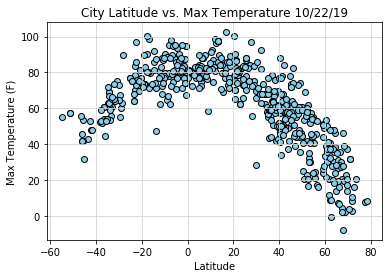

In [48]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature 10/22/19")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure1_latvstemp")
plt.show()

#### Latitude vs. Humidity Plot

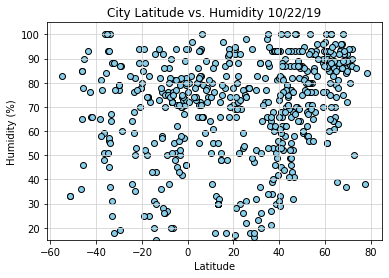

In [49]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity 10/22/19")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure2_latvshumidity")
plt.show()

#### Latitude vs. Cloudiness Plot

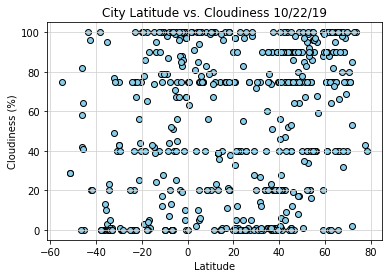

In [50]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness 10/22/19")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure3_latvscloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

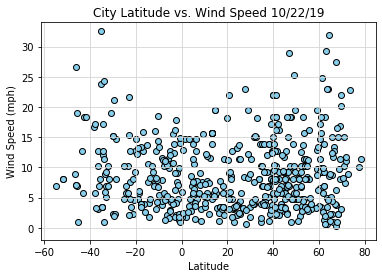

In [51]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed 10/22/19")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure4_latvswindspeed")
plt.show()